<a href="https://colab.research.google.com/github/salahagnir/CA2/blob/main/CA_2_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#warnings
import warnings
warnings.filterwarnings('ignore')

In [42]:
df = pd.read_csv('/content/drive/MyDrive/CA2/TII01.20231126154500.csv')

In [43]:
df.head()

,STATISTIC,Statistic Label,TLIST(W1),Year,C03132V03784,Luas Line,C01198V01436,Weeks of the year,UNIT,VALUE
0,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,1,Week 01,Number,549533.0
1,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,2,Week 02,Number,839022.0
2,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,3,Week 03,Number,819359.0
3,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,4,Week 04,Number,860745.0
4,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,5,Week 05,Number,912795.0


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   STATISTIC          795 non-null    object 
 1   Statistic Label    795 non-null    object 
 2   TLIST(W1)          795 non-null    int64  
 3   Year               795 non-null    int64  
 4   C03132V03784       795 non-null    object 
 5   Luas Line          795 non-null    object 
 6   C01198V01436       795 non-null    int64  
 7   Weeks of the year  795 non-null    object 
 8   UNIT               795 non-null    object 
 9   VALUE              744 non-null    float64
dtypes: float64(1), int64(3), object(6)
memory usage: 62.2+ KB


In [45]:
df.shape

(795, 10)

In [46]:
df.dtypes

STATISTIC             object
Statistic Label       object
TLIST(W1)              int64
Year                   int64
C03132V03784          object
Luas Line             object
C01198V01436           int64
Weeks of the year     object
UNIT                  object
VALUE                float64
dtype: object

In [47]:
df.describe()

,TLIST(W1),Year,C01198V01436,VALUE
count,795.000000,795.000000,795.000000,7.440000e+02
mean,2021.000000,2021.000000,27.000000,4.326046e+05
std,1.415104,1.415104,15.306688,2.646196e+05
min,2019.000000,2019.000000,1.000000,1.972700e+04
25%,2020.000000,2020.000000,14.000000,2.257425e+05
50%,2021.000000,2021.000000,27.000000,4.148065e+05
75%,2022.000000,2022.000000,40.000000,5.244765e+05
max,2023.000000,2023.000000,53.000000,1.173473e+06


In [48]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


In [49]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
STATISTIC            0.000000
Statistic Label      0.000000
TLIST(W1)            0.000000
Year                 0.000000
C03132V03784         0.000000
Luas Line            0.000000
C01198V01436         0.000000
Weeks of the year    0.000000
UNIT                 0.000000
VALUE                6.415094
dtype: float64


In [50]:
df=df.dropna()

In [51]:
df.isnull().sum()

STATISTIC            0
Statistic Label      0
TLIST(W1)            0
Year                 0
C03132V03784         0
Luas Line            0
C01198V01436         0
Weeks of the year    0
UNIT                 0
VALUE                0
dtype: int64

In [52]:
df

,STATISTIC,Statistic Label,TLIST(W1),Year,C03132V03784,Luas Line,C01198V01436,Weeks of the year,UNIT,VALUE
0,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,1,Week 01,Number,549533.0
1,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,2,Week 02,Number,839022.0
2,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,3,Week 03,Number,819359.0
3,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,4,Week 04,Number,860745.0
4,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,5,Week 05,Number,912795.0
...,...,...,...,...,...,...,...,...,...,...
776,TII01C01,Passenger Journeys,2023,2023,2,Green line,35,Week 35,Number,411878.0
777,TII01C01,Passenger Journeys,2023,2023,2,Green line,36,Week 36,Number,432905.0
778,TII01C01,Passenger Journeys,2023,2023,2,Green line,37,Week 37,Number,445474.0
779,TII01C01,Passenger Journeys,2023,2023,2,Green line,38,Week 38,Number,498593.0


In [53]:
import plotly.express as px
# Create a histogram for a numerical column (e.g., 'VALUE' in your dataset)
fig = px.histogram(df, x='VALUE', title='Histogram of Passenger Journeys')
fig.show()

In [54]:
total_passenger_journeys = df.groupby('Luas Line')['VALUE'].sum()
print(total_passenger_journeys)

Luas Line
All Luas lines    160928894.0
Green line         78047147.0
Red line           82881757.0
Name: VALUE, dtype: float64


In [55]:
color_scheme = ['blue', 'red', 'green']

fig = px.bar(df, x='Luas Line', y='VALUE', title='Bar Plot of Passenger Journeys by Luas Line', color='Luas Line', color_discrete_sequence=color_scheme)
fig.show()

In [56]:
color_scheme = ['blue', 'red', 'green']

fig = px.box(df, x='Luas Line', y='VALUE', title='Box Plot of Passenger Journeys by Luas Line', color='Luas Line', color_discrete_sequence=color_scheme)
fig.show()

In [57]:
pip install dash pandas plotly

In [58]:
import dash
from dash import dcc, html
import plotly.express as px

In [59]:
total_passenger_journeys = df.groupby('Luas Line')['VALUE'].sum()
print(total_passenger_journeys)

Luas Line
All Luas lines    160928894.0
Green line         78047147.0
Red line           82881757.0
Name: VALUE, dtype: float64


In [60]:
# Initialize the Dash app
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1('Luas Line Statistics Dashboard'),
    dcc.Graph(
        id='luas-line-stats',
        figure=px.line(df, x='Weeks of the year', y='VALUE', color='Luas Line', title='Luas Line Statistics')
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

<IPython.core.display.Javascript object>

In [61]:
# Convert 'Weeks of the year' column to extract numerical week information
df['Numerical_Week'] = df['Weeks of the year'].str.extract('(\d+)').astype(int)

In [62]:
df=df.drop(["STATISTIC","Statistic Label","TLIST(W1)","C03132V03784","C01198V01436","UNIT","Weeks of the year"],axis=1)

In [63]:
df = pd.get_dummies(df, columns=['Luas Line'])

In [64]:
df

,Year,VALUE,Numerical_Week,Luas Line_All Luas lines,Luas Line_Green line,Luas Line_Red line
0,2019,549533.0,1,1,0,0
1,2019,839022.0,2,1,0,0
2,2019,819359.0,3,1,0,0
3,2019,860745.0,4,1,0,0
4,2019,912795.0,5,1,0,0
...,...,...,...,...,...,...
776,2023,411878.0,35,0,1,0
777,2023,432905.0,36,0,1,0
778,2023,445474.0,37,0,1,0
779,2023,498593.0,38,0,1,0


In [65]:
df1 = pd.read_csv('/content/drive/MyDrive/CA2/TII01.20231126154500.csv')

In [66]:
df1

,STATISTIC,Statistic Label,TLIST(W1),Year,C03132V03784,Luas Line,C01198V01436,Weeks of the year,UNIT,VALUE
0,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,1,Week 01,Number,549533.0
1,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,2,Week 02,Number,839022.0
2,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,3,Week 03,Number,819359.0
3,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,4,Week 04,Number,860745.0
4,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,5,Week 05,Number,912795.0
...,...,...,...,...,...,...,...,...,...,...
790,TII01C01,Passenger Journeys,2023,2023,2,Green line,49,Week 49,Number,NaN
791,TII01C01,Passenger Journeys,2023,2023,2,Green line,50,Week 50,Number,NaN
792,TII01C01,Passenger Journeys,2023,2023,2,Green line,51,Week 51,Number,NaN
793,TII01C01,Passenger Journeys,2023,2023,2,Green line,52,Week 52,Number,NaN


In [67]:
# Convert 'Weeks of the year' column to extract numerical week information
df1['Weeks'] = df1['Weeks of the year'].str.extract('(\d+)').astype(int)

In [68]:
df=df1.drop(["Weeks of the year"],axis=1)

In [69]:
df

,STATISTIC,Statistic Label,TLIST(W1),Year,C03132V03784,Luas Line,C01198V01436,UNIT,VALUE,Weeks
0,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,1,Number,549533.0,1
1,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,2,Number,839022.0,2
2,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,3,Number,819359.0,3
3,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,4,Number,860745.0,4
4,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,5,Number,912795.0,5
...,...,...,...,...,...,...,...,...,...,...
790,TII01C01,Passenger Journeys,2023,2023,2,Green line,49,Number,NaN,49
791,TII01C01,Passenger Journeys,2023,2023,2,Green line,50,Number,NaN,50
792,TII01C01,Passenger Journeys,2023,2023,2,Green line,51,Number,NaN,51
793,TII01C01,Passenger Journeys,2023,2023,2,Green line,52,Number,NaN,52


In [70]:
df=df.dropna()

In [71]:
df

,STATISTIC,Statistic Label,TLIST(W1),Year,C03132V03784,Luas Line,C01198V01436,UNIT,VALUE,Weeks
0,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,1,Number,549533.0,1
1,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,2,Number,839022.0,2
2,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,3,Number,819359.0,3
3,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,4,Number,860745.0,4
4,TII01C01,Passenger Journeys,2019,2019,-,All Luas lines,5,Number,912795.0,5
...,...,...,...,...,...,...,...,...,...,...
776,TII01C01,Passenger Journeys,2023,2023,2,Green line,35,Number,411878.0,35
777,TII01C01,Passenger Journeys,2023,2023,2,Green line,36,Number,432905.0,36
778,TII01C01,Passenger Journeys,2023,2023,2,Green line,37,Number,445474.0,37
779,TII01C01,Passenger Journeys,2023,2023,2,Green line,38,Number,498593.0,38


Six Rules of Tuft's

Show the data:

Emphasizes the core purpose of any visualization to accurately and clearly convey the underlying data.


In [72]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df1.head())

First few rows of the dataset:
  STATISTIC     Statistic Label  TLIST(W1)  Year C03132V03784       Luas Line  \
0  TII01C01  Passenger Journeys       2019  2019            -  All Luas lines   
1  TII01C01  Passenger Journeys       2019  2019            -  All Luas lines   
2  TII01C01  Passenger Journeys       2019  2019            -  All Luas lines   
3  TII01C01  Passenger Journeys       2019  2019            -  All Luas lines   
4  TII01C01  Passenger Journeys       2019  2019            -  All Luas lines   

   C01198V01436 Weeks of the year    UNIT     VALUE  Weeks  
0             1           Week 01  Number  549533.0      1  
1             2           Week 02  Number  839022.0      2  
2             3           Week 03  Number  819359.0      3  
3             4           Week 04  Number  860745.0      4  
4             5           Week 05  Number  912795.0      5  


Maximize the data-ink ratio:

A measure of the ink (or pixels) used to represent non-redundant data information compared to the total ink used in the graphic.


Data-Ink Ratio: 721007.6120071685


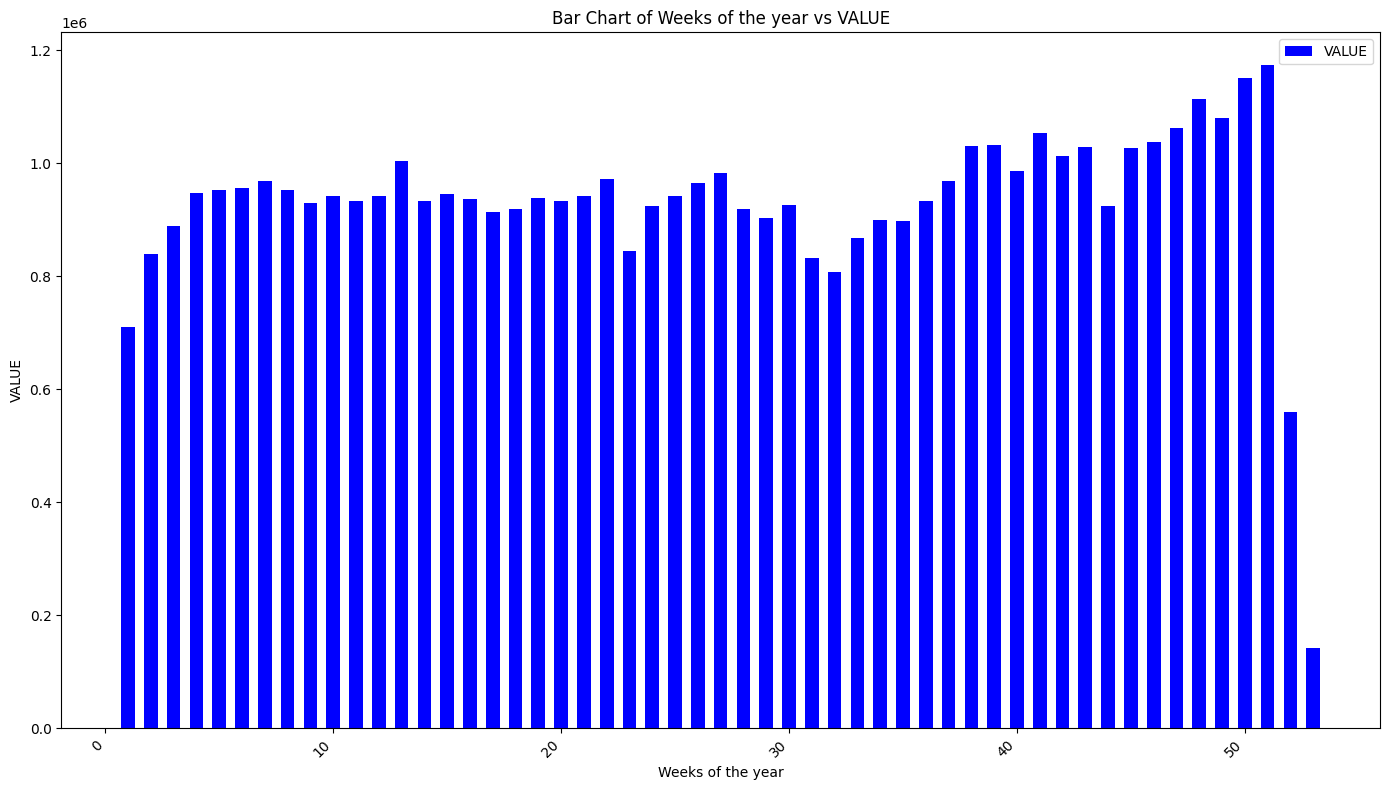

In [73]:

bar_width = 0.6

# Plotting the bar chart
plt.figure(figsize=(14, 8))  # Increased figure size
plt.bar(df['Weeks'], df['VALUE'], width=bar_width, color='blue', label='VALUE')

# Adding labels and title
plt.xlabel('Weeks of the year')
plt.ylabel('VALUE')
plt.title('Bar Chart of Weeks of the year vs VALUE')
plt.legend()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Calculating data-ink ratio
total_ink = len(df)
total_length_of_bars = total_ink * bar_width
data_ink = df['VALUE'].sum()
data_ink_ratio = data_ink / total_length_of_bars

print(f"Data-Ink Ratio: {data_ink_ratio}")

# Display the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

Erase non-data ink:

Encourages the removal of any ink or graphical elements that do not directly contribute to the representation of the data.


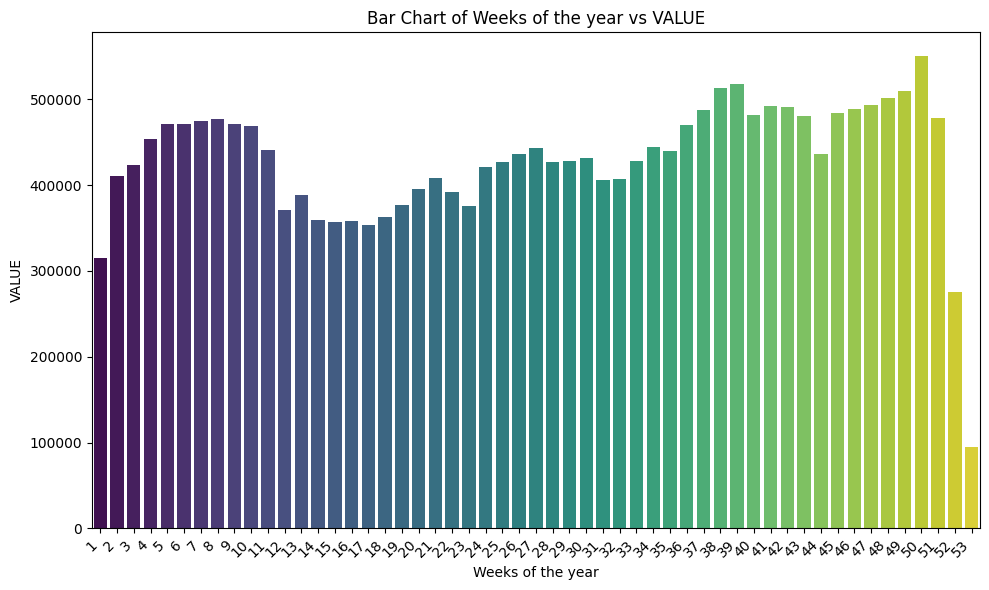

In [74]:
# Remove non-essential design elements, like gridlines and background color
plt.figure(figsize=(10, 6))
sns.barplot(x='Weeks', y='VALUE', data=df, ci=None, palette='viridis')
plt.xlabel('Weeks of the year')
plt.ylabel('VALUE')
plt.title('Bar Chart of Weeks of the year vs VALUE')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Erase redundant data ink:

Recommends eliminating redundant or duplicative ink that does not provide additional meaningful information.


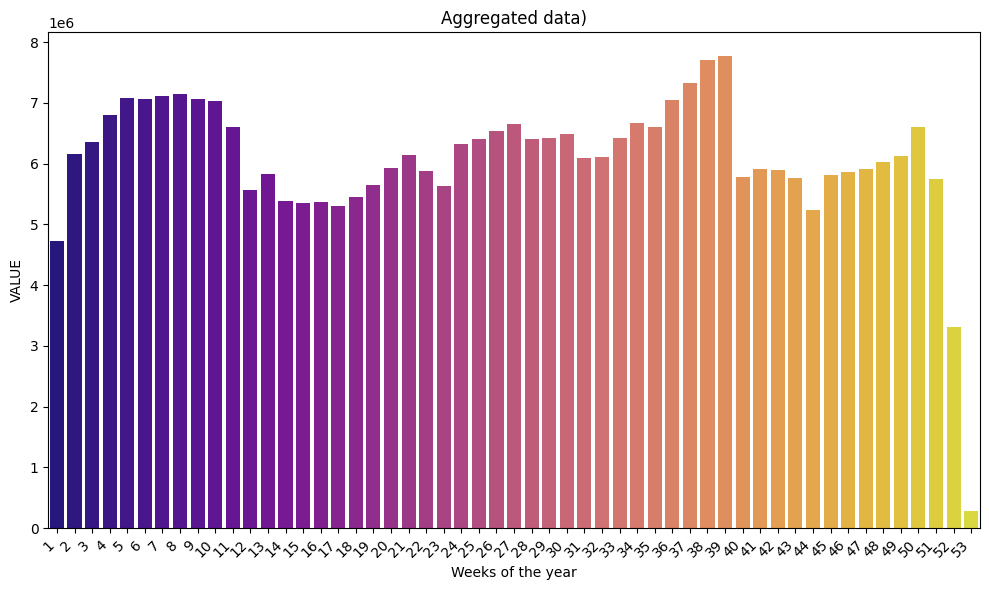

In [75]:
# Aggregate the data by 'Type of Vehicle'
df_agg = df.groupby('Weeks')['VALUE'].sum().reset_index()

# Plot the aggregated data
plt.figure(figsize=(10, 6))
sns.barplot(x='Weeks', y='VALUE', data=df_agg, ci=None, palette='plasma')
plt.xlabel('Weeks of the year')
plt.ylabel('VALUE')
plt.title('Aggregated data)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Revise and edit:

Emphasizes the importance of continuous revision and editing to enhance clarity, accuracy, and overall effectiveness.


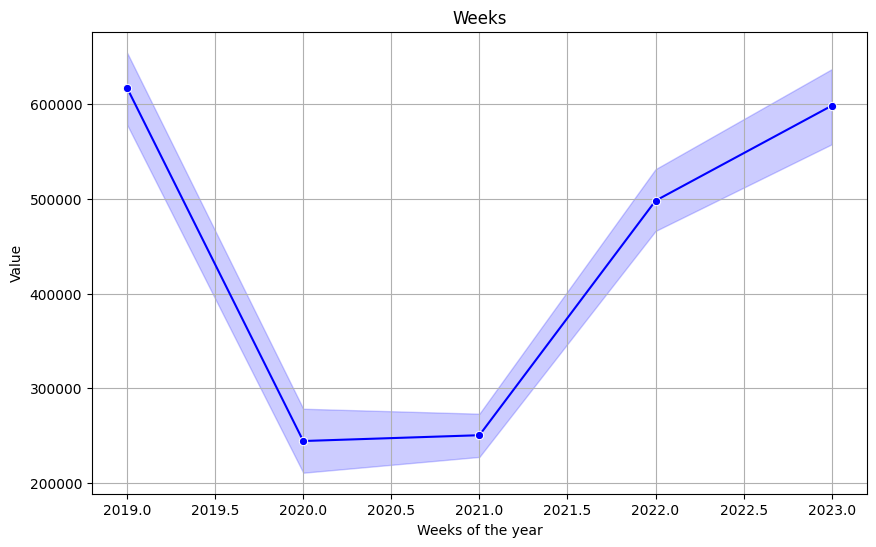

In [76]:
# Assuming your dataset has columns 'Year' and 'VALUE,' and you want to visualize the trend over years
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='VALUE', data=df, marker='o', color='blue')
plt.title('Weeks')
plt.xlabel('Weeks of the year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

#Maximize the data ink ratio, within reason:

Acknowledges the need for balance, advising designers to avoid excessive complexity that could hinder readability while still maximizing the data-ink ratio.


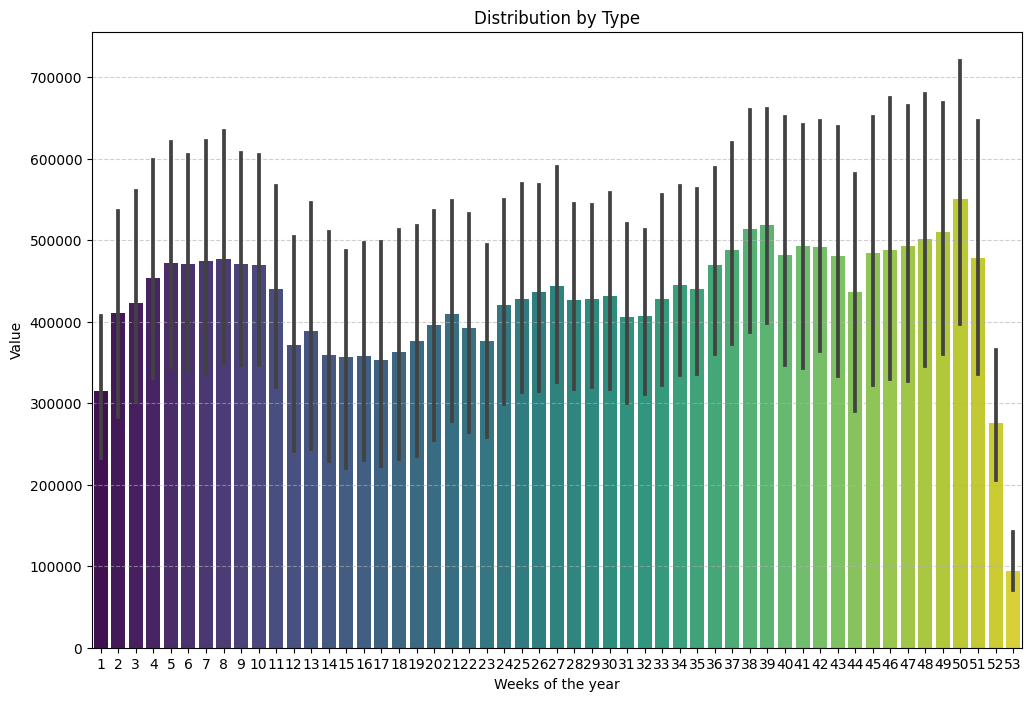

In [77]:
# Assuming your dataset has columns 'Type of Vehicle' and 'VALUE,' and you want to visualize the distribution
plt.figure(figsize=(12, 8))
sns.barplot(x='Weeks', y='VALUE', data=df, palette='viridis')
plt.title('Distribution by Type')
plt.xlabel('Weeks of the year')
plt.ylabel('Value')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.show()